# Chapter 5 - Interactively Compare Values with Bar Charts and Dropdown Menus

* Plotting bar charts vertically and horizontally 
* Linking bar charts and Dropdowns 
* Exploring different ways of displaying multiple bar charts (stacked, grouped, overlaid, and relative) 
* Using facets to split charts into multiple sub-charts, horizontally, vertically, or wrapped 
* Exploring additional features of Dropdowns (allowing multiple selections, adding placeholder text, and more)  

In [2]:
import os
import pandas as pd
pd.options.display.max_columns = None
import plotly.express as px
from jupyter_dash import JupyterDash
# import dash_core_components as dcc
# import dash_html_components as html
from dash import Dash
from dash import html
from dash import dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate
import plotly
import jupyter_dash as jd

for p in [plotly, pd, dcc, html, dbc, jd]:
    print(f'{p.__name__:-<30}v{p.__version__}')

plotly------------------------v5.9.0
pandas------------------------v2.0.3
dash.dcc----------------------v2.12.1
dash.html---------------------v2.0.15
dash_bootstrap_components-----v1.5.0
jupyter_dash------------------v0.4.2


In [3]:
pathData = 'C:/GitHub/23-4002-LPTool/Interactive-Dashboards-Book/data/'
# poverty_data = pd.read_csv('../data/PovStatsData.csv')
# poverty = pd.read_csv('../data/poverty.csv', low_memory=False)
poverty_data = pd.read_csv(os.path.join(pathData, 'PovStatsData.csv'))
poverty = pd.read_csv(os.path.join(pathData, 'poverty.csv'), low_memory=False)
poverty.head()

,Country Name,Country Code,year,"Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)","Annualized growth in per capita real survey mean consumption or income, top 10% (%)","Annualized growth in per capita real survey mean consumption or income, top 60% (%)","Annualized growth in per capita real survey mean consumption or income, total population (%)",Annualized growth in per capita real survey median income or consumption expenditure (%),GINI index (World Bank estimate),Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change),Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change),Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Median daily per capita income or consumption expenditure (2011 PPP),"Multidimensional poverty, Drinking water (% of population deprived)","Multidimensional poverty, Educational attainment (% of population deprived)","Multidimensional poverty, Educational enrollment (% of population deprived)","Multidimensional poverty, Electricity (% of population deprived)","Multidimensional poverty, Headcount ratio (% of population)","Multidimensional poverty, Monetary poverty (% of population deprived)","Multidimensional poverty, Sanitation (% of population deprived)",Number of poor at $1.90 a day (2011 PPP) (millions),Number of poor at $3.20 a day (2011 PPP) (millions),Number of poor at $5.50 a day (2011 PPP) (millions),"Population, total",Poverty gap at $1.90 a day (2011 PPP) (%),Poverty gap at $3.20 a day (2011 PPP) (% of population),Poverty gap at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day, Female (2011 PPP) (% of female population)","Poverty headcount ratio at $1.90 a day, Male (2011 PPP) (% of male population)","Poverty headcount ratio at $1.90 a day, age 0-14 (2011 PPP) (% of population age 0-14)","Poverty headcount ratio at $1.90 a day, age 15-64 (2011 PPP) (% of population age 15-64)","Poverty headcount ratio at $1.90 a day, age 65+ (2011 PPP) (% of population age 65+)","Poverty headcount ratio at $1.90 a day, rural (2011 PPP) (% of rural population)","Poverty headcount ratio at $1.90 a day, urban (2011 PPP) (% of urban population)","Poverty headcount ratio at $1.90 a day, with primary education (2011 PPP) (% of population age 16+ with primary education)","Poverty headcount ratio at $1.90 a day, with secondary education (2011 PPP) (% of population age 16+ with secondary education)","Poverty headcount ratio at $1.90 a day, without education (2011 PPP) (% of population age 16+ without education)","Poverty headcount ratio at $1.90 a day, with Tertiary/post-secondary education (2011 PPP) (% of population age 16+ with Tertiary/post-secondary education)",Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Poverty headcount ratio at national poverty lines (% of population), including noncomparable values",Redistribution component of change in poverty at $1.90 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $3.20 a day (2011 PPP) (% of change),Redistribution component of change in poverty at $5.50 a day (2011 PPP) (% of change),"Survey mean consumption or income per capita, bottom 40% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 10% (2011 PPP $ per day)","Survey mean consumption or income per capita, top 60% (2011 PPP $ per day)","Survey mean consumption or income per capita, total population (2011 PPP $ per day)",Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Spe

In [3]:
series = pd.read_csv(os.path.join(pathData, '../data/PovStatsSeries.csv'))
series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,SI.DST.02ND.20,Poverty: Income distribution,Income share held by second 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
1,SI.DST.03RD.20,Poverty: Income distribution,Income share held by third 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,"Despite progress in the last decade, the chall...",NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN


In [4]:
for k, v in series[series['Indicator Name'].str.contains("GINI")].to_dict().items():
    print('\n')
    print(k, sep=': ')
    print(list(v.values())[0])
    



Series Code
SI.POV.GINI


Topic
Poverty: Income distribution


Indicator Name
GINI index (World Bank estimate)


Short definition
nan


Long definition
Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.


Unit of measure
%


Periodicity
Annual


Base Period
nan


Other notes
nan


Aggregation method
nan


Limitations and exceptions
Gini coefficients are not unique. It is possible for two different Lor

In [5]:
print(series[series['Indicator Name'].str.contains('20%')]['Limitations and exceptions'][0])

Despite progress in the last decade, the challenges of measuring poverty remain. The timeliness, frequency, quality, and comparability of household surveys need to increase substantially, particularly in the poorest countries. The availability and quality of poverty monitoring data remains low in small states, countries with fragile situations, and low-income countries and even some middle-income countries. The low frequency and lack of comparability of the data available in some countries create uncertainty over the magnitude of poverty reduction. 

Besides the frequency and timeliness of survey data, other data quality issues arise in measuring household living standards. The surveys ask detailed questions on sources of income and how it was spent, which must be carefully recorded by trained personnel. Income is generally more difficult to measure accurately, and consumption comes closer to the notion of living standards. And income can vary over time even if living standards do not.

In [6]:
gini = 'GINI index (World Bank estimate)'

In [7]:
poverty[gini].min(), poverty[gini].max()

(20.2, 65.8)

In [8]:
poverty[gini].describe()

count    1674.000000
mean       38.557766
std         9.384352
min        20.200000
25%        31.300000
50%        36.400000
75%        45.275000
max        65.800000
Name: GINI index (World Bank estimate), dtype: float64

In [9]:
series[series['Indicator Name']==gini]['Topic']

26    Poverty: Income distribution
Name: Topic, dtype: object

In [10]:
series[series['Indicator Name']==gini]['Long definition'].values[0]

'Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.'

In [10]:
for year in [1980, 1990, 2000]:
    df = poverty[poverty['year']==year].sort_values(gini).dropna(subset=[gini])
    n_countries = len(df['Country Name'])
    fig = px.bar(df,
                 x=gini, 
                 y='Country Name',
                 title=' - '.join([gini, str(year)]), 
                 height=200 + (20 * n_countries),
                 width=650,
                 orientation='h')
    fig.layout.paper_bgcolor = '#E5ECF6'
    fig.show()

In [11]:
df.to_excel('gini.xlsx')

In [26]:
app = Dash(__name__, external_stylesheets=[dbc.themes.MORPH])

gini_df = poverty[poverty[gini].notna()]

app.layout = html.Div([
    dcc.Dropdown(id='gini_year_dropdown', options=[{'label': year, 'value': year}
                                     for year in gini_df['year'].drop_duplicates().sort_values()]),
    dcc.Graph(id='gini_year_barchart')
])

@app.callback(Output('gini_year_barchart', 'figure'), Input('gini_year_dropdown', 'value'))
def display_gini_year_chart(year):
    if not year:
        raise PreventUpdate
    df = gini_df[gini_df['year'].eq(year)].sort_values(gini).dropna(subset=[gini])
    n_countries = len(df['Country Name'])
    chart = px.bar(df,
                   x=gini,
                   y='Country Name', 
                   orientation='h',
                   height=200 + (n_countries*20), 
                   width=650,
                   title=gini + ' ' + str(year))
    return chart

# app.run(mode='inline', port=8550, debug=True)
app.run(mode='external', port=8550, debug=True)

In [ ]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(id='gini_country_dropdown',
                 options=[{'label': country, 'value': country}
                          for country in gini_df['Country Name'].unique()]),
    html.Br(),
    dcc.Graph(id='gini_country_barchart')
])

@app.callback(Output('gini_country_barchart', 'figure'),
              Input('gini_country_dropdown', 'value'))
def display_country_barcharts(country):
    if not country:
        raise PreventUpdate
    df = gini_df[gini_df['Country Name']==country].dropna(subset=[gini])
    fig = px.bar(df, x='year', y=gini, 
                   title=' - '.join([gini, country]))
    return fig


# app.run_server(mode='inline', port=8051)
app.run_server(mode='external', port=8550)

In [29]:
countries = ['Algeria', 'Japan', 'United Kingdom']
df = poverty[poverty['Country Name'].isin(countries)].dropna(subset=[gini])
fig = px.bar(df,
             x='year',
             y=gini, 
             facet_row='Country Name',
             labels={gini: 'Gini Index'},
             color='Country Name',
             title='<br>'.join([gini, ', '.join(countries)]),
             height=100 + 250*len(countries))
fig

In [30]:
# from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

app = Dash(__name__, external_stylesheets=[dbc.themes.COSMO])

app.layout = html.Div([
    html.Br(),
    html.H2('Gini Index - World Bank Data', style={'textAlign': 'center'}),
    html.Br(),
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(id='gini_year_dropdown',
                         options=[{'label': y, 'value': y}
                                  for y in gini_df['year'].drop_duplicates().sort_values()]),
            html.Br(),
            dcc.Graph(id='gini_year_barchart')
        ]),
        dbc.Col([
            dcc.Dropdown(id='gini_country_dropdown',
                         multi=True,
                         options=[{'label': country, 'value': country}
                                  for country in gini_df['Country Name'].unique()]),
            html.Br(),
            dcc.Graph(id='gini_country_barchart')
        ]),
    ])
])

@app.callback(Output('gini_year_barchart', 'figure'),
              Input('gini_year_dropdown', 'value'))
def plot_gini_year_barchart(year):
    if not year:
        raise PreventUpdate
    df = gini_df[gini_df['year'].eq(year)].sort_values(gini).dropna(subset=[gini])
    n_countries = len(df['Country Name'])
    fig = px.bar(df,
                 x=gini,
                 y='Country Name', 
                 orientation='h',
                 height=200 + (n_countries*20), 
                 title=gini + ' ' + str(year))
    return fig


@app.callback(Output('gini_country_barchart', 'figure'),
              Input('gini_country_dropdown', 'value'))
def plot_gini_country_barchart(countries):
    if not countries:
        raise PreventUpdate
    df = gini_df[gini_df['Country Name'].isin(countries)].dropna(subset=[gini])
    fig = px.bar(df,
                 x='year',
                 y=gini, 
                 height=100 + (250*len(countries)),
                 facet_row='Country Name',
                 labels={gini: 'Gini Index'},
                 color='Country Name',
                 title=''.join([gini, '<br>', '<b>',
                                ', '.join(countries), '</b>']))
    return fig

if __name__ == '__main__':
    app.run_server(mode='inline', port=8550)

In [16]:
app = JupyterDash(__name__)


categories = ['Region', 'Income Group']

app.layout = html.Div([
    dcc.Dropdown(id='year', options=[{'label': year, 'value': year}
                                     for year in gini_df['year'].unique()]),
    dcc.Dropdown(id='country_category',
                 options=[{'label': category, 'value': category}
                          for category in categories]),
    dcc.Graph(id='gini_chart')
])

@app.callback(Output('gini_chart', 'figure'), Input('year', 'value'), Input('country_category', 'value'))
def display_gini_year_chart(year, category):
    if not year:
        raise PreventUpdate
    df = gini_df[gini_df['year'].eq(year)].sort_values(gini).dropna(subset=[gini])
    fig = px.bar(df, y='Country Name', x=gini, orientation='h',
                   height=800, width=700,
                   title=gini + ' ' + str(year), color=category)
    return fig

app.run_server(mode='inline', port=8053)

In [17]:
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'a': [-2, -1, 0.5, 1, 2],
    'b': [-3, 3, 2, -4, 5]
})
df

,x,a,b
0,1,-2.0,-3
1,2,-1.0,3
2,3,0.5,2
3,4,1.0,-4
4,5,2.0,5


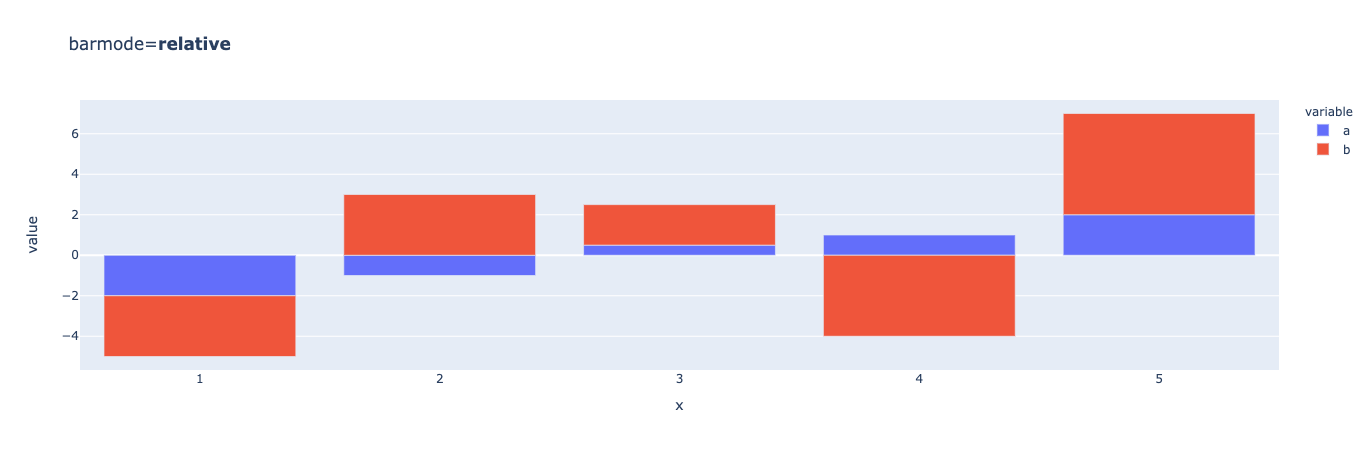

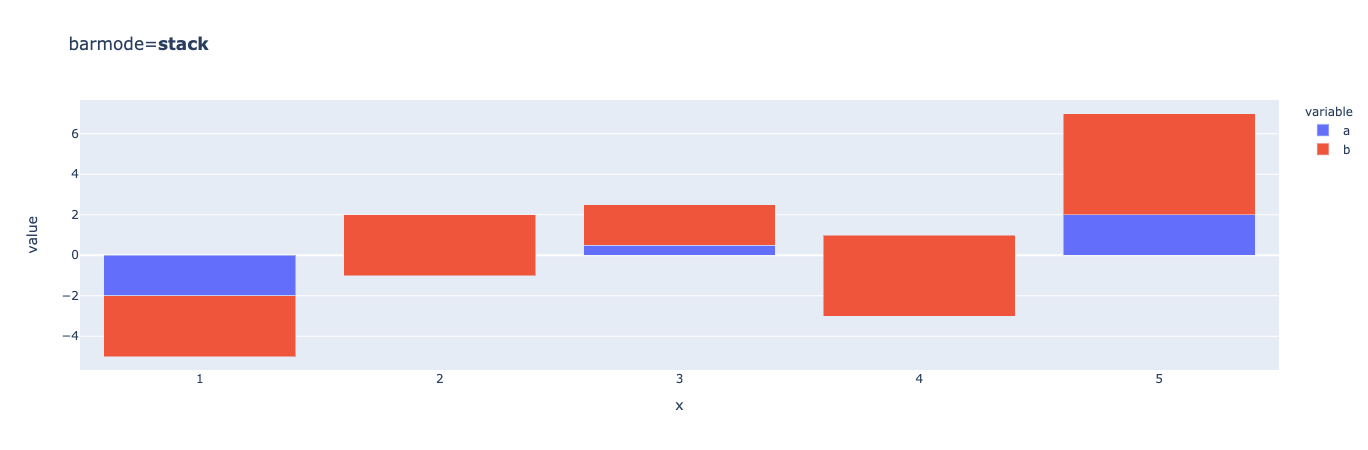

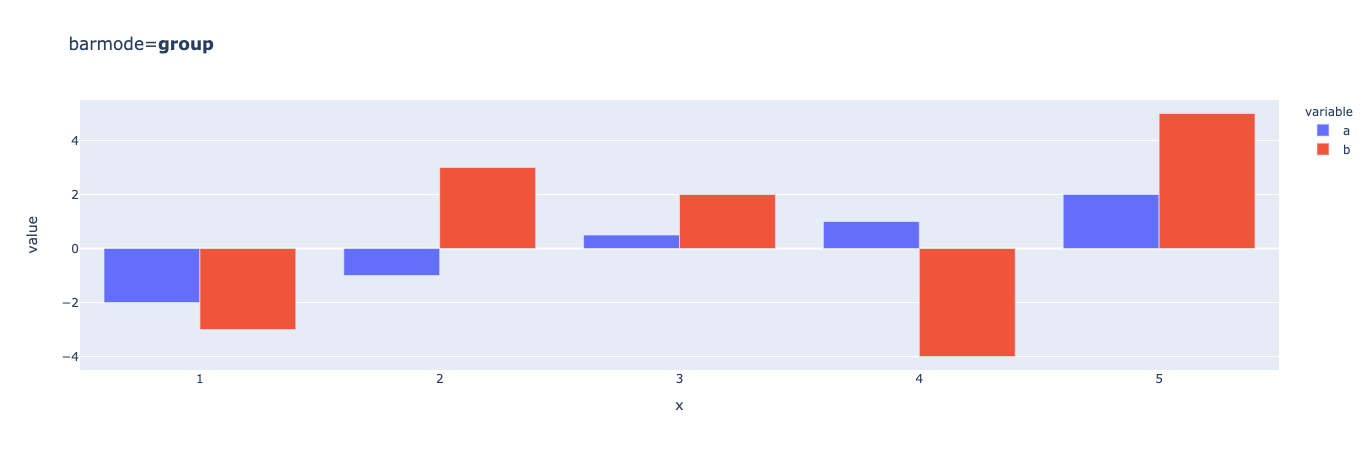

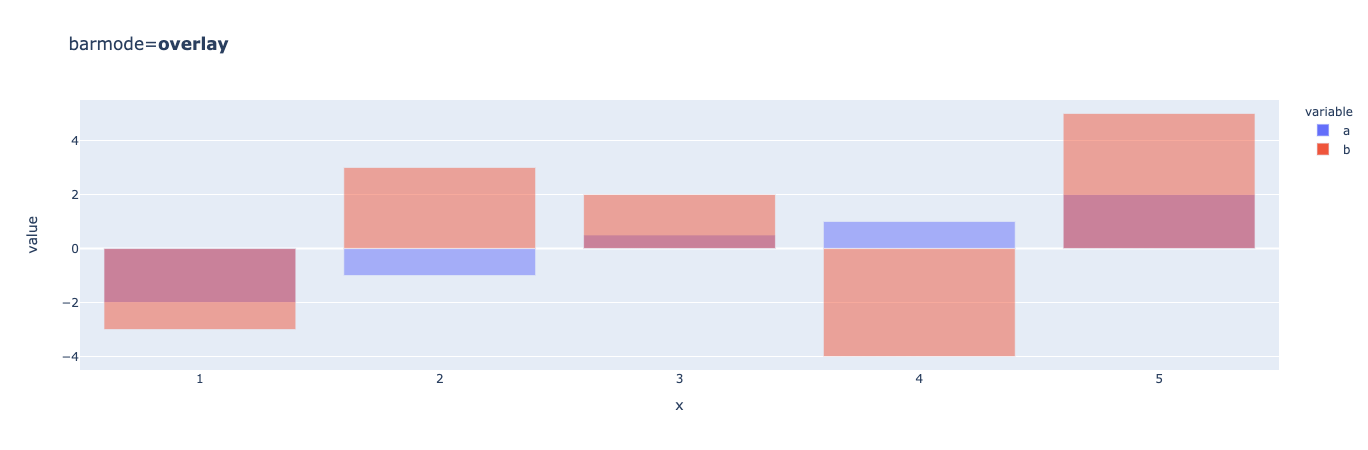

In [18]:
for mode in ['relative', 'stack', 'group',   'overlay']:
    fig = px.bar(df, x='x', y=['a', 'b'], barmode=mode, title=f'barmode=<b>{mode}</b>')
    fig.show()

In [4]:
import re
income_share_df = poverty.filter(regex='Country Name|^year$|Income share.*?20').dropna()
income_share_df = income_share_df.rename(columns={
    'Income share held by lowest 20%': '1 Income share held by lowest 20%',
    'Income share held by second 20%': '2 Income share held by second 20%',
    'Income share held by third 20%': '3 Income share held by third 20%',
    'Income share held by fourth 20%': '4 Income share held by fourth 20%',
    'Income share held by highest 20%': '5 Income share held by highest 20%'
}).sort_index(axis=1)


income_share_df.columns = [re.sub('\d Income share held by ', '', col).title()
                           for col in income_share_df.columns]
income_share_cols = income_share_df.columns[:-2]
income_share_df

,Lowest 20%,Second 20%,Third 20%,Fourth 20%,Highest 20%,Country Name,Year
67,9.2,13.7,17.7,23.3,36.1,Albania,1996
73,8.4,12.6,16.5,22.2,40.4,Albania,2002
76,8.4,12.9,17.0,22.5,39.2,Albania,2005
79,8.9,13.1,16.8,22.2,39.0,Albania,2008
83,8.9,13.2,17.3,22.8,37.8,Albania,2012
...,...,...,...,...,...,...,...
8229,3.5,6.8,11.1,19.1,59.5,Zambia,2006
8233,3.8,6.8,10.5,17.9,61.1,Zambia,2010
8238,2.9,6.0,10.6,19.3,61.3,Zambia,2015
8279,5.8,9.5,14.0,21.0,49.7,Zimbabwe,2011


In [5]:
income_share_cols

Index(['Lowest 20%', 'Second 20%', 'Third 20%', 'Fourth 20%', 'Highest 20%'], dtype='object')

In [6]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(id='income_share_country_dropdown', 
                 options=[{'label': country, 'value': country}
                          for country in income_share_df['Country Name'].unique()]),
    dcc.Graph(id='income_share_country_barchart')
])

@app.callback(Output('income_share_country_barchart', 'figure'),
              Input('income_share_country_dropdown', 'value'))
def plot_income_share_barchart(country):
    if country is None:
        raise PreventUpdate
    fig = px.bar(income_share_df[income_share_df['Country Name']==country].dropna(), 
                 x=income_share_cols,
                 y='Year',
                 barmode='stack',
                 height=600, 
                 hover_name='Country Name',
                 title=f'Income Share Quintiles - {country}',
                 orientation='h')
    fig.layout.legend.title = None
    fig.layout.legend.orientation = 'h'
    fig.layout.legend.x = 0.2
    fig.layout.xaxis.title = 'Percent of Total Income'
    return fig

app.run_server(mode='inline', port=8054)